In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

## Dataset - 20.06.2023

In [2]:
df = pd.read_csv('dataset/Animal_Shelter_Intake_and_Outcome.csv', sep=';')

Name - Name of the animal. Animal names with an asterisk before them were given by shelter staff.<br>
Type - Type of animal<br>
Breed - Breed of animal<br>
Color - Color of animal, Black, Chocolate, White….
<br>Sex - Male, Female, Neutered Male, Spayed Female
<br>Size - Large, medium, small, toy
<br>Date Of Birth - Approximate date of birth.
<br>Impound Number - Animal impound number
<br>Kennel Number - Kennel number indicating its current location.
<br>Animal ID - Unique ID
<br>Intake Date	- Date animal was taken into the shelter
<br>Outcome Date - Date animal left the shelter
<br>Days in Shelter	- Number of days the animal was in the shelter
<br>Intake Type	- Reason for intake
<br>Intake Subtype - Sub reason for intake
<br>Outcome Type - Reason for release from shelter
<br>Outcome Subtype	- Sub reason for release from shelter
<br>Intake Condition - Animals condition at intake
<br>Outcome Condition - Animals condition at release from shelter
<br>Intake Jurisdiction	- Jurisdiction responsible for animal intake
<br>Outcome Jurisdiction - Area animal went to.
<br>Outcome Zip Code - Zip code where animal went to.
<br>Location - Latitude, Longitude coordinates for outcome jurisdiction
<br>Count - Column for performing arithmetic and creating groups for views and visualizations

In [3]:
df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,K22-043412,TRUCK,A396382,...,FIELD,RETURN TO OWNER,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.43807, -122.71247)",1
1,NaN,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MED,NaN,K23-044765,DS53,A417653,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
2,NaN,DOG,SIBERIAN HUSKY/MIX,RED,Female,MED,NaN,K23-044764,DS49,A417654,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
3,NaN,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MED,NaN,K23-044766,DS60,A417652,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,K23-044756,DS62,A417644,...,FIELD,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,K19-033988,CA02,A392014,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,*HEALDSBURG,95448.0,"95448(38.61064, -122.86883)",1
25431,*JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,K18-028720,CA01,A374156,...,OVER THE COUNTER,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,"95407(38.41483, -122.72707)",1
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,K14-010771,DS70,A293651,...,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,UNTREATABLE,UNTREATABLE,SANTA ROSA,COUNTY,95476.0,"95476(38.29188, -122.45728)",1
25433,*NEWTON,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,K20-036116,DS91,A398415,...,FIELD,TRANSFER,ROCKET DOG,HEALTHY,HEALTHY,SANTA ROSA,OUT OF COUNTY,94146.0,94146,1


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = LabelEncoder()

labeled_df = df.apply(encoder.fit_transform)
labeled_df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,5691,1,198,29,2,4,4846,24267,155,17687,...,3,5,63,3,1,11,10,458,470,1
1,6778,1,492,18,2,2,5791,25208,90,22727,...,20,7,235,3,1,9,8,392,400,1
2,6778,1,951,223,0,2,5791,25207,86,22728,...,20,7,235,3,1,9,8,392,400,1
3,6778,1,472,18,2,2,5791,25209,97,22726,...,20,7,235,3,1,9,8,392,400,1
4,3225,1,937,29,0,4,2246,25200,99,22719,...,3,7,235,3,1,9,8,392,400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,2931,0,408,191,2,4,4645,18172,4,16928,...,20,0,225,0,1,11,2,488,509,1
25431,1020,2,52,304,3,4,5012,14318,3,13740,...,20,7,88,0,1,11,8,461,476,1
25432,6023,1,743,269,2,1,5654,2388,107,1233,...,20,4,7,4,5,11,8,511,538,1
25433,1478,1,307,116,2,4,3371,19600,128,18043,...,3,7,192,0,1,11,9,277,278,1


## Correlation matrix

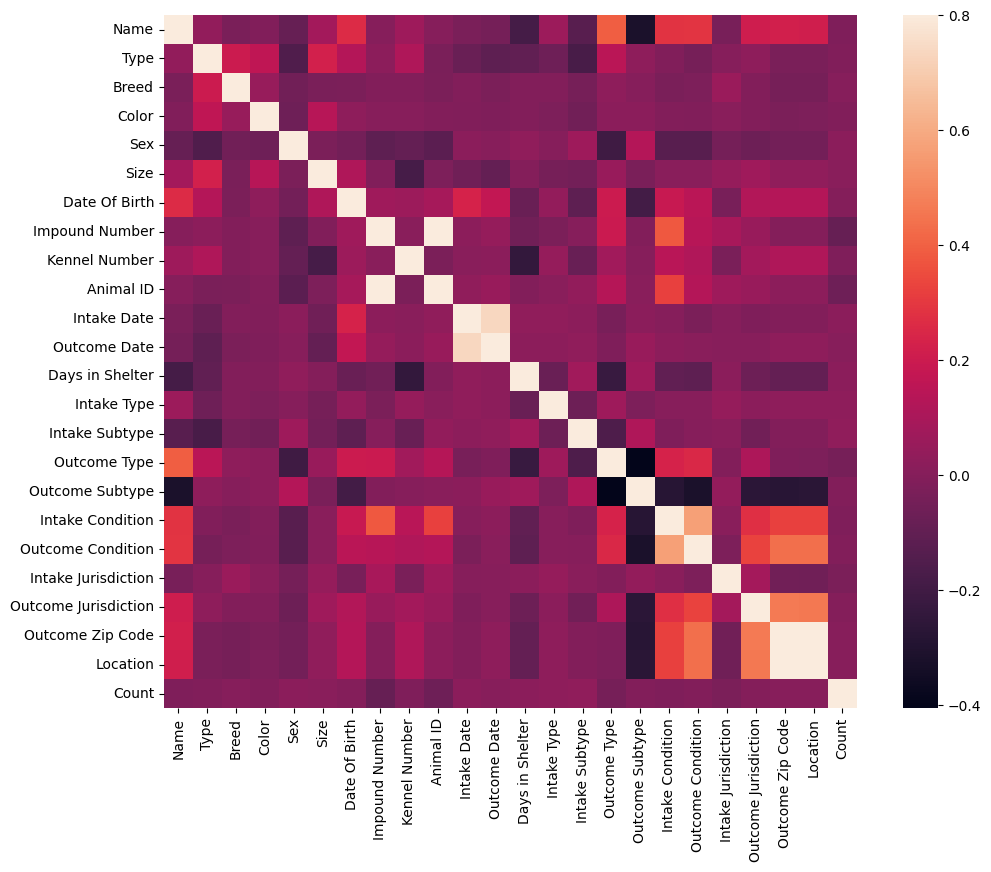

In [5]:
corrmat = labeled_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Dropping columns based on the correlation matrix

In [6]:
df = df.drop(['Impound Number', 'Animal ID', 'Intake Subtype', 'Outcome Date', 'Outcome Subtype', 'Intake Jurisdiction', 'Outcome Jurisdiction', 'Count'], axis=1)

## Location map

### Splitting location into latitude and longitude

In [7]:
import re

regex_string = r'\(([-+]?\d+\.\d+), ([-+]?\d+\.\d+)\)'

latitude = []
longitude = []

for i in range(len(df)):
    x = df['Location'][i]
    if '(' not in str(x):
        latitude.append(np.nan)
        longitude.append(np.nan)
    else:
        match = re.search(regex_string, df['Location'][i])
        if match:
            x = match[1]
            y = match[2]
            latitude.append(x)
            longitude.append(y)
        else:
            latitude.append(np.nan)
            longitude.append(np.nan)

In [8]:
latitude = pd.Series(latitude)
longitude = pd.Series(longitude)

df['Latitude'] = latitude.astype(float)
df['Longitude'] = longitude.astype(float)

df = df.drop(['Location'], axis=1)
df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Outcome Zip Code,Latitude,Longitude
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,TRUCK,12/26/2022,0,STRAY,RETURN TO OWNER,UNKNOWN,HEALTHY,95404.0,38.43807,-122.71247
1,NaN,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MED,NaN,DS53,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
2,NaN,DOG,SIBERIAN HUSKY/MIX,RED,Female,MED,NaN,DS49,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
3,NaN,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MED,NaN,DS60,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,DS62,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,CA02,10/03/2019,20,STRAY,ADOPTION,HEALTHY,HEALTHY,95448.0,38.61064,-122.86883
25431,*JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,112,STRAY,TRANSFER,HEALTHY,HEALTHY,95407.0,38.41483,-122.72707
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,DS70,09/11/2014,21,STRAY,EUTHANIZE,UNTREATABLE,UNTREATABLE,95476.0,38.29188,-122.45728
25433,*NEWTON,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,DS91,07/02/2020,49,STRAY,TRANSFER,HEALTHY,HEALTHY,94146.0,NaN,NaN


### Showing locations on the map

c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


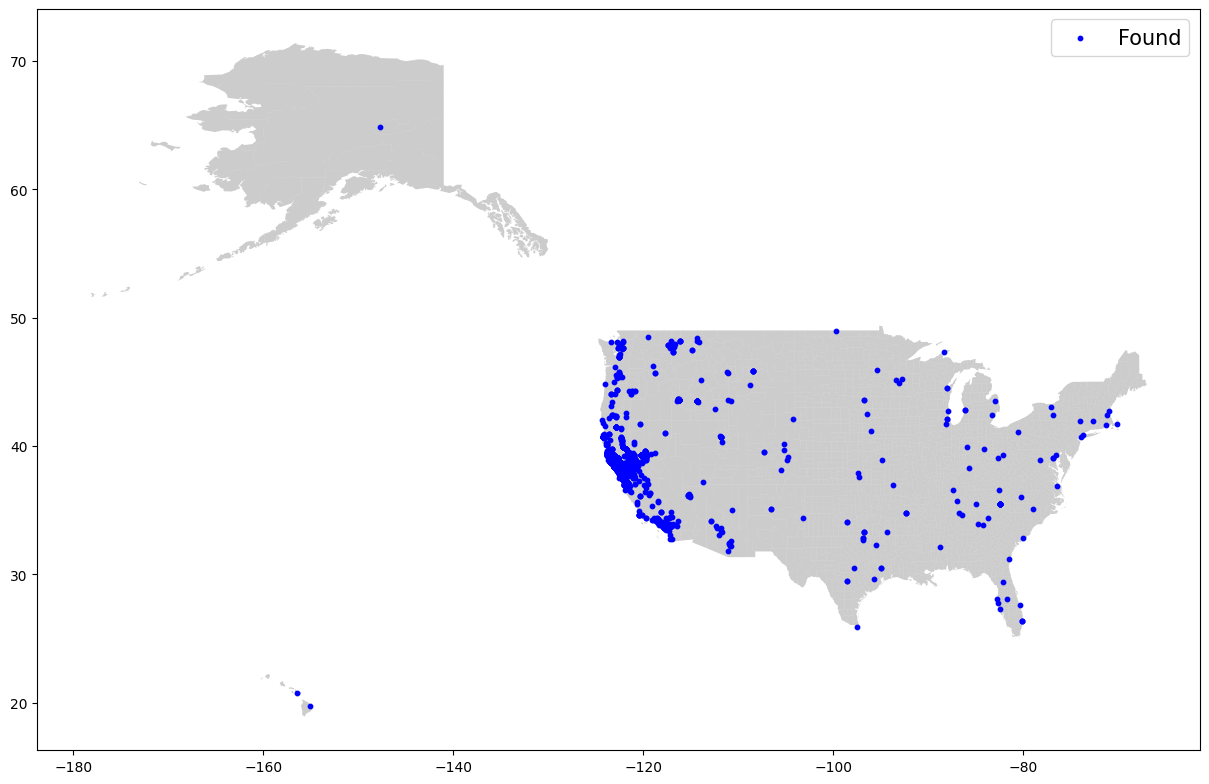

In [9]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

street_map = gpd.read_file('dataset/USA_Counties.shp')
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax, 
            markersize=10, 
            color='blue', 
            marker='o', 
            label='Found')

plt.legend(prop={'size':15})

In [10]:
outliers_location_latitude = df[df['Latitude'] > 60]
outliers_location_longitude = df[df['Longitude'] < -150]

outliers_location = pd.concat([outliers_location_latitude, outliers_location_longitude])
outliers_location

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Outcome Zip Code,Latitude,Longitude
18129,BUDDY,DOG,SIBERIAN HUSKY/MIX,BLACK/WHITE,Neutered,LARGE,NaN,DS67,01/06/2015,1,STRAY,RETURN TO OWNER,HEALTHY,HEALTHY,99701.0,64.84527,-147.72213
9368,*GARTH,DOG,AUST CATTLE DOG/MIX,WHITE/TAN,Neutered,MED,11/03/2013,DA09,02/22/2014,14,TRANSFER,ADOPTION,HEALTHY,HEALTHY,96720.0,19.71924,-155.08185
16530,*JESSICA,OTHER,RABBIT SH,WHITE/TRICOLOR,Spayed,SMALL,08/06/2014,CA01,07/18/2015,21,STRAY,ADOPTION,HEALTHY,HEALTHY,96753.0,20.78250,-156.46334


In [11]:
print("Dataframe shape before dropping outliers: ", df.shape)
df = df.drop(outliers_location.index, axis=0)
print("Dataframe shape after dropping outliers: ", df.shape)

Dataframe shape before dropping outliers:  (25435, 17)
Dataframe shape after dropping outliers:  (25432, 17)


## Null check

In [12]:
df.isnull().sum()

Name                 6670
Type                    0
Breed                   0
Color                   0
Sex                     0
Size                   35
Date Of Birth        6328
Kennel Number          30
Intake Date             0
Days in Shelter         0
Intake Type             0
Outcome Type          217
Intake Condition        0
Outcome Condition     564
Outcome Zip Code     3724
Latitude             4006
Longitude            4006
dtype: int64

## Names analysis

In [13]:
df["Name"].fillna("Unknown", inplace=True)

In [14]:
df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Outcome Zip Code,Latitude,Longitude
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,TRUCK,12/26/2022,0,STRAY,RETURN TO OWNER,UNKNOWN,HEALTHY,95404.0,38.43807,-122.71247
1,Unknown,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MED,NaN,DS53,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
2,Unknown,DOG,SIBERIAN HUSKY/MIX,RED,Female,MED,NaN,DS49,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
3,Unknown,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MED,NaN,DS60,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,DS62,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,CA02,10/03/2019,20,STRAY,ADOPTION,HEALTHY,HEALTHY,95448.0,38.61064,-122.86883
25431,*JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,112,STRAY,TRANSFER,HEALTHY,HEALTHY,95407.0,38.41483,-122.72707
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,DS70,09/11/2014,21,STRAY,EUTHANIZE,UNTREATABLE,UNTREATABLE,95476.0,38.29188,-122.45728
25433,*NEWTON,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,DS91,07/02/2020,49,STRAY,TRANSFER,HEALTHY,HEALTHY,94146.0,NaN,NaN


In [15]:
unique_names = df['Name'].unique().tolist()
unique_names[:10]

['RAZOR',
 'Unknown',
 'CHLOE',
 'MAX',
 'OSO',
 'FELLA',
 'PUDGY',
 'LEXI',
 'KENJI',
 'SONOMA']

In [16]:
import re

def show_unique_names_with_special_characters():
    unique_names = df['Name'].unique().tolist()
    special_names = []
    for name in unique_names:        
        if re.match("^[a-zA-Z_\s]*$", name):
            continue
        else:
            print(name)
            special_names.append(name)
    return special_names

In [17]:
df['Name'] = df['Name'].str.replace('*', '')
df['Name'] = df['Name'].str.replace('"', '')
df['Name']

0          RAZOR
1        Unknown
2        Unknown
3        Unknown
4          CHLOE
          ...   
25430       BUBA
25431    JESSICA
25432     SHINER
25433     NEWTON
25434    Unknown
Name: Name, Length: 25432, dtype: object

In [18]:
special_names = show_unique_names_with_special_characters()

29102
29101
T-BONE
TUFFY/SCOOCH
CAT 4
U.D.
29207
29209
29206
29208
29203
29204
29205
7
13
49
50
51
42
29
55
36
9
53
46
63
17
30
10
40
48
8
4
23
34
47
56
62
3
18
37
61
24
14
2
32
54
11
60
33
52
59
66
5
1
22
25
58
28
6
26
31
21
19
35
64
44
39
43
15
67
16
12
27
45
41
65
38
57
20
BLANCA G.
D-BO
ID #27211
BOND (JAMES)
LIL' JENN
CHOPPER-GIRL
LOBO/LUPITO
MANGO/ROGER
CAT 1
O'TOOLE
CAT2
HOBBES/OTEO
ID# 27472
LORENA D.
HSSC #28021
27154
EDDIE/CAPUCHINO
ID #27210
JEAN-CLAUDE
OBI-WAN
JET/JELLY
MADDIE 2
DACODA (CODY)
BON-BON
D.O.G.
CHIEF/BEAR
D'ARTAGNAN
ID #27209
THOR/ERF
SIOUX 2
DIEGO 2
MIA/MEOW MEOW
I-LLEY
MR. ROGERS
L.J.
PEARLE-ROSE
BULLY/BILLY
CAT 2
MR. B
B.B.
FIDO-LYTE
ID #27213
COYO/KING
ID #27383
ID# 27467
MR. DARCY
25309
27168
P.J.
CINNA-BUN
PUN'KIN
CLARABELLE-BELLA
DBO/ZEUS
ID # 27258
CAT#1
SHERRY/DIXIE
ROCKY/RAMSEY
COUNTY CAT #341158
ID #27384
MR. CUDDLES
L'IL BROTHER
PINK!
TERA/MADISON
CHEESE-MO
R2D2
LUNA (FORMERLY MING)
HSSC ID 28002
MS.WELLINGTON
R.J.
MOE/BANDIT
ROXY/CHICA
25-30
WAHR-H

### Handling names with only digits

In [19]:
for name in special_names:
    if re.match("^\d+$", name):        
        index = df[df['Name'] == name].index
        df.loc[index, 'Name'] = 'Unknown'

In [20]:
df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Outcome Zip Code,Latitude,Longitude
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,TRUCK,12/26/2022,0,STRAY,RETURN TO OWNER,UNKNOWN,HEALTHY,95404.0,38.43807,-122.71247
1,Unknown,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MED,NaN,DS53,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
2,Unknown,DOG,SIBERIAN HUSKY/MIX,RED,Female,MED,NaN,DS49,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
3,Unknown,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MED,NaN,DS60,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,DS62,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,CA02,10/03/2019,20,STRAY,ADOPTION,HEALTHY,HEALTHY,95448.0,38.61064,-122.86883
25431,JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,112,STRAY,TRANSFER,HEALTHY,HEALTHY,95407.0,38.41483,-122.72707
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,DS70,09/11/2014,21,STRAY,EUTHANIZE,UNTREATABLE,UNTREATABLE,95476.0,38.29188,-122.45728
25433,NEWTON,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,DS91,07/02/2020,49,STRAY,TRANSFER,HEALTHY,HEALTHY,94146.0,NaN,NaN


In [21]:
special_names = show_unique_names_with_special_characters()

T-BONE
TUFFY/SCOOCH
CAT 4
U.D.
BLANCA G.
D-BO
ID #27211
BOND (JAMES)
LIL' JENN
CHOPPER-GIRL
LOBO/LUPITO
MANGO/ROGER
CAT 1
O'TOOLE
CAT2
HOBBES/OTEO
ID# 27472
LORENA D.
HSSC #28021
EDDIE/CAPUCHINO
ID #27210
JEAN-CLAUDE
OBI-WAN
JET/JELLY
MADDIE 2
DACODA (CODY)
BON-BON
D.O.G.
CHIEF/BEAR
D'ARTAGNAN
ID #27209
THOR/ERF
SIOUX 2
DIEGO 2
MIA/MEOW MEOW
I-LLEY
MR. ROGERS
L.J.
PEARLE-ROSE
BULLY/BILLY
CAT 2
MR. B
B.B.
FIDO-LYTE
ID #27213
COYO/KING
ID #27383
ID# 27467
MR. DARCY
P.J.
CINNA-BUN
PUN'KIN
CLARABELLE-BELLA
DBO/ZEUS
ID # 27258
CAT#1
SHERRY/DIXIE
ROCKY/RAMSEY
COUNTY CAT #341158
ID #27384
MR. CUDDLES
L'IL BROTHER
PINK!
TERA/MADISON
CHEESE-MO
R2D2
LUNA (FORMERLY MING)
HSSC ID 28002
MS.WELLINGTON
R.J.
MOE/BANDIT
ROXY/CHICA
25-30
WAHR-HEIT
ID# 27465
SI-SI
HSSC ID 28019
DAISY (FORMERLY JADE)
CAT 3
WALL-E
MR. DOODLE
BOO-BOO
MARCUS W.
NENAGH (NINA)
JEAN-LUC
MR. WAFFLES
CHEEZE-IT
HSSC ID #28090
MI-DEL
ALI-I
COUNTY CAT #375543
OREO (GUPPY)
ID# 27466
27140 - CLEO
GIRO/LEO
PARKER (GRACIE)
MINNIE P.
QUE

### Handling names like 27139 - MICKEY

In [22]:
for name in special_names:
    if re.match("\d+\s-\s", name):
        index = df[df['Name'] == name].index
        for i in index:
            df.loc[i, 'Name'] = df.loc[i, 'Name'].split(' - ')[1]

### Handling names like 

In [23]:
for name in special_names:
    if re.match("[a-zA-Z]+\s\d", name):
        index = df[df['Name'] == name].index
        for i in index:
            df.loc[i, 'Name'] = df.loc[i, 'Name'].split(' ')[0]

In [24]:
regex = "CAT\s|\sCAT\s|CAT#|CAT\d|[a-zA-Z]+\sCAT\s|ID#|ID\s#|[a-zA-Z]+\sID"
for name in special_names:
    if re.match(regex, name):        
        index = df[df['Name'] == name].index
        df.loc[index, 'Name'] = 'Unknown'

In [25]:
special_names = show_unique_names_with_special_characters()

T-BONE
TUFFY/SCOOCH
U.D.
BLANCA G.
D-BO
BOND (JAMES)
LIL' JENN
CHOPPER-GIRL
LOBO/LUPITO
MANGO/ROGER
O'TOOLE
HOBBES/OTEO
LORENA D.
HSSC #28021
EDDIE/CAPUCHINO
JEAN-CLAUDE
OBI-WAN
JET/JELLY
DACODA (CODY)
BON-BON
D.O.G.
CHIEF/BEAR
D'ARTAGNAN
THOR/ERF
MIA/MEOW MEOW
I-LLEY
MR. ROGERS
L.J.
PEARLE-ROSE
BULLY/BILLY
MR. B
B.B.
FIDO-LYTE
COYO/KING
MR. DARCY
P.J.
CINNA-BUN
PUN'KIN
CLARABELLE-BELLA
DBO/ZEUS
SHERRY/DIXIE
ROCKY/RAMSEY
MR. CUDDLES
L'IL BROTHER
PINK!
TERA/MADISON
CHEESE-MO
R2D2
LUNA (FORMERLY MING)
MS.WELLINGTON
R.J.
MOE/BANDIT
ROXY/CHICA
25-30
WAHR-HEIT
SI-SI
DAISY (FORMERLY JADE)
WALL-E
MR. DOODLE
BOO-BOO
MARCUS W.
NENAGH (NINA)
JEAN-LUC
MR. WAFFLES
CHEEZE-IT
MI-DEL
ALI-I
OREO (GUPPY)
GIRO/LEO
PARKER (GRACIE)
MINNIE P.
FERN/BELLA
TITAN/WOOF
O'MALLEY
CAPT.MIDNITE
ONIPA-A
POCKET/MR SWEET
KAPUA'L NUI
MR. SPROCKET
KOO-KOO
MR. TUX
DA-VEED
YA-TAH-HEY
PUPPY BOY/OJ
KEEK - GAY BALL
FOZZY/PUIPUI
PEE-WEE
LULU (BELLA)
LUCY/MILLIE
SMOKY/COURAG
CHEE-CHEE
ACE/TAYLOR
MARY-KATE
TIP-TOE
LIL' DEBBIE
W

In [26]:
df['Name'].isnull().sum()

0

In [27]:
df["HasName"] = df["Name"].apply(lambda x: 0 if x == "Unknown" else 1)

## Type analysis

In [28]:
unique_types = df['Type'].unique().tolist()
unique_types

['DOG', 'OTHER', 'CAT']

In [29]:
otherAnimals = df[df["Type"] == "OTHER"]["Breed"].unique().tolist()
otherAnimals[:20]

['PIGEON',
 'BAT',
 'HORSE',
 'BAT/MEX FREE-TAIL',
 'DUCK/MUSCOVY',
 'CHICKEN',
 'OTHER BIRD',
 'DUCK',
 'PIG',
 'RABBIT SH',
 'HAVANA/MIX',
 'GUINEA PIG',
 'LOVEBIRD',
 'LOP-AMER FUZZY',
 'FINCH',
 'SHEEP',
 'PEAFOWL',
 'HAMSTER',
 'CANARY',
 'SKUNK']

## Breed analysis

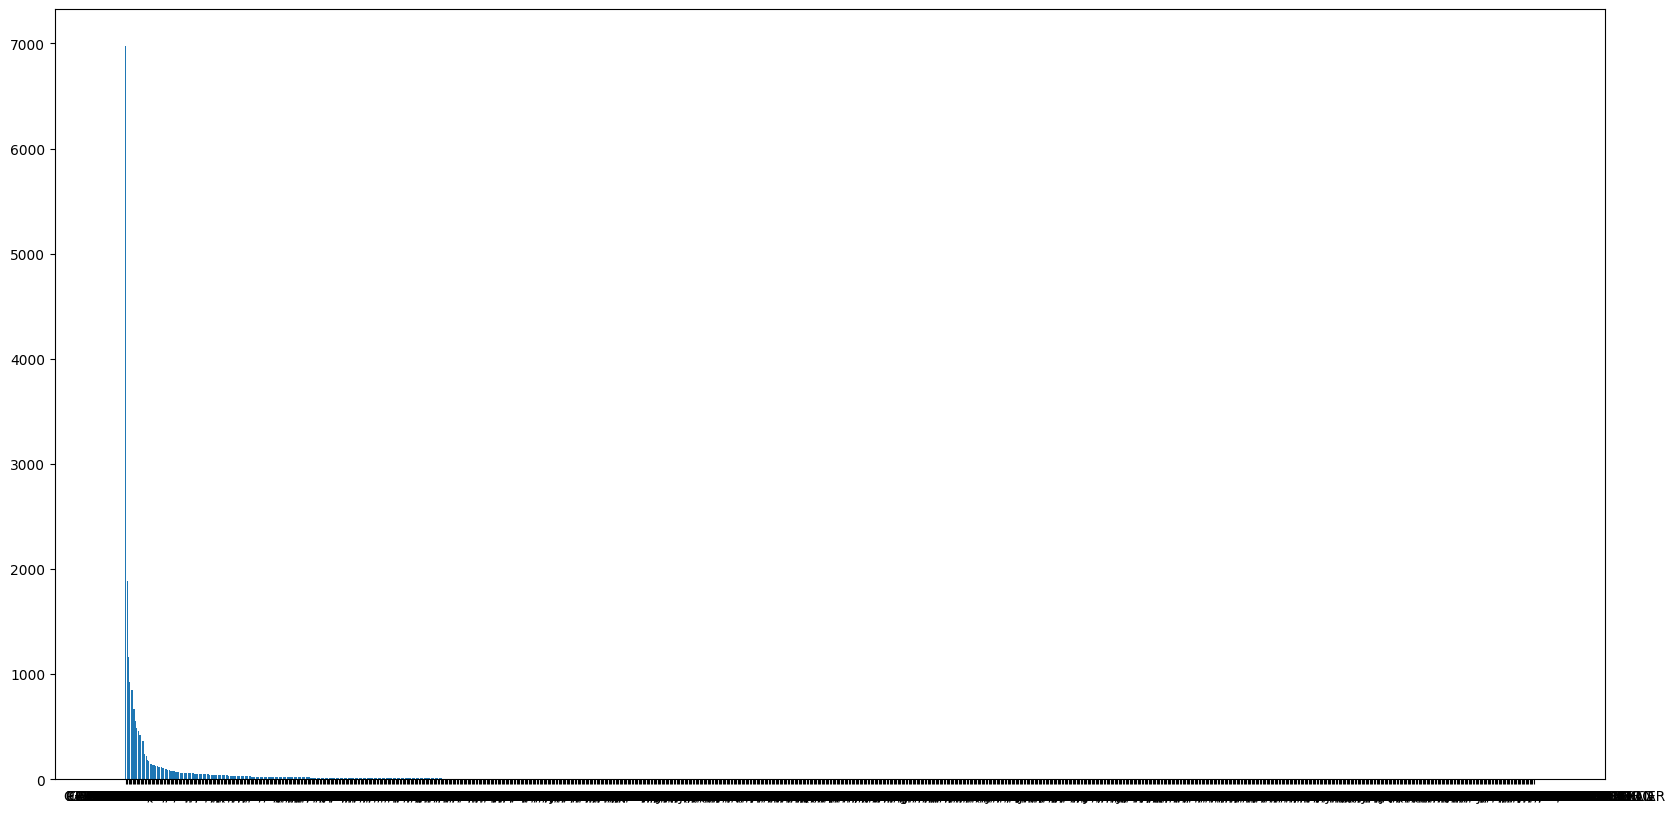

In [30]:
topTenBreeds = df["Breed"].value_counts()
topTenBreeds = topTenBreeds.to_dict()
plt.figure(figsize=(20,10))
plt.bar(topTenBreeds.keys(), topTenBreeds.values())
plt.show()

Zbiór zwiera różne zwierzęta

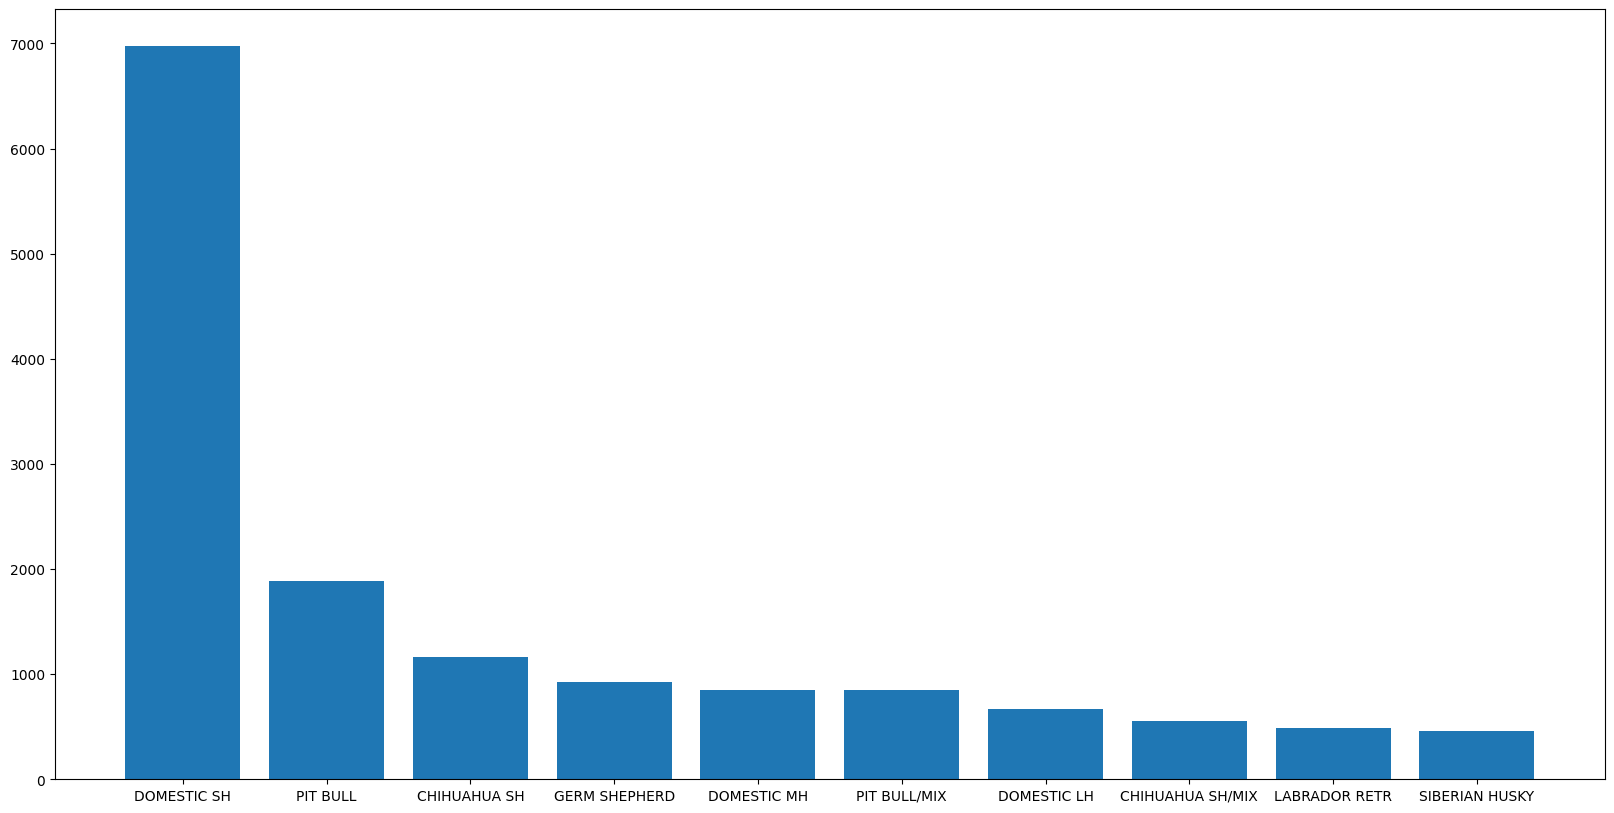

In [31]:
topTenBreeds = df["Breed"].value_counts().head(10)
topTenBreeds = topTenBreeds.to_dict()
plt.figure(figsize=(20,10))
plt.bar(topTenBreeds.keys(), topTenBreeds.values())
plt.show()

In [32]:
df["Sex"].unique()

array(['Neutered', 'Female', 'Unknown', 'Spayed', 'Male'], dtype=object)

In [33]:
# df = df.replace("Neutered", "Male")
# df = df.replace("Spayed", "Female")

In [34]:
df["Size"].unique()

array(['SMALL', 'MED', 'X-LRG', 'KITTN', 'LARGE', 'PUPPY', 'TOY', nan],
      dtype=object)

In [35]:
df = df.replace("MED", "MEDIUM")
df['Size'] = df['Size'].ffill()

In [36]:
df.shape

(25432, 18)

In [37]:
sorted(df["Color"].unique())

['AGOUTI',
 'APRICOT',
 'APRICOT/WHITE',
 'BL BRINDLE',
 'BL BRINDLE/BLACK',
 'BL BRINDLE/GRAY',
 'BL BRINDLE/TAN',
 'BL BRINDLE/WHITE',
 'BLACK',
 'BLACK/BL BRINDLE',
 'BLACK/BLACK',
 'BLACK/BLK SMOKE',
 'BLACK/BLK TABBY',
 'BLACK/BLUE',
 'BLACK/BLUE MERLE',
 'BLACK/BLUE TICK',
 'BLACK/BR BRINDLE',
 'BLACK/BRN MERLE',
 'BLACK/BROWN',
 'BLACK/CHOCOLATE',
 'BLACK/CREAM',
 'BLACK/GOLD',
 'BLACK/GRAY',
 'BLACK/ORANGE',
 'BLACK/PURPLE',
 'BLACK/RED',
 'BLACK/SILVER',
 'BLACK/TAN',
 'BLACK/TRICOLOR',
 'BLACK/WHITE',
 'BLACK/YELLOW',
 'BLK SMOKE',
 'BLK SMOKE/WHITE',
 'BLK TABBY',
 'BLK TABBY/GRAY',
 'BLK TABBY/GRAY TIGER',
 'BLK TABBY/TORTIE',
 'BLK TABBY/WHITE',
 'BLK TIGER/GRAY',
 'BLK TIGER/TAN',
 'BLONDE',
 'BLUE',
 'BLUE CREAM',
 'BLUE CREAM/BRN TABBY',
 'BLUE CREAM/CALICO',
 'BLUE CREAM/TORTIE',
 'BLUE CREAM/WHITE',
 'BLUE MERLE',
 'BLUE MERLE/BLACK',
 'BLUE MERLE/GRAY',
 'BLUE MERLE/TAN',
 'BLUE MERLE/WHITE',
 'BLUE PT',
 'BLUE PT/WHITE',
 'BLUE TABBY',
 'BLUE TICK',
 'BLUE TICK/BLAC

In [38]:
len(df["Color"].unique())

340

In [39]:
def check_and_replace_color(colors):
    unique_colors = {}
    
    for color in colors:
        parts = color.split("/")
        if len(parts) == 2:
            reversed_color = "/".join(reversed(parts))
            if reversed_color in unique_colors:
                unique_colors[color] = unique_colors[reversed_color]
            else:
                unique_colors[color] = color
        else:
            unique_colors[color] = color
    
    updated_colors = [unique_colors[color] for color in colors]
    return updated_colors

In [40]:
def replace_same_colors(colors):
    updated_colors = []
    
    for color in colors:
        parts = color.split("/")
        if len(parts) == 2 and parts[0] == parts[1]:
            updated_colors.append(parts[0])
        else:
            updated_colors.append(color)
    
    return updated_colors

In [41]:
# not_fixed_colors = df["Color"].copy()
# df["Color"] = check_and_replace_color(df["Color"])
# df["Color"] = replace_same_colors(df["Color"])

In [42]:
# len(not_fixed_colors.unique())

In [43]:
# len(df["Color"].unique())

In [44]:
# colors = df["Color"].value_counts()
# colors[colors < 20]
# df["Color"] = df["Color"].apply(lambda x: "OTHER" if x in colors[colors < 20] else x)

In [45]:
# unique_colors_before = not_fixed_colors.unique()
# unique_colors_after = df["Color"].unique()

In [46]:
# diff = len(unique_colors_before) - len(unique_colors_after)

# tmp = list(unique_colors_after)
# for i in range(diff):
#     tmp.append(0)
    
# unique_colors_after = np.asarray(tmp)

# data = {
#     "Before": unique_colors_before,
#     "After": unique_colors_after
# }

# df_for_colors_check = pd.DataFrame(data)
# df_for_colors_check
# df_for_colors_check.to_csv("./test_data/test.csv")

In [47]:
df["Intake Condition"].unique()

array(['UNKNOWN', 'HEALTHY', 'TREATABLE/MANAGEABLE', 'TREATABLE/REHAB',
       'UNTREATABLE'], dtype=object)

In [48]:
# df = df.replace("TREATABLE/MANAGEABLE", "TREATABLE")
# df = df.replace("TREATABLE/REHAB", "TREATABLE")

In [49]:
df[df["Days in Shelter"].str.contains(",")]

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Outcome Zip Code,Latitude,Longitude,HasName
18320,CHARLIE,DOG,GOLDEN RETR,GOLD,Neutered,LARGE,10/27/2014,FREEZER,05/07/2018,"1,239",CONFISCATE,DISPOSAL,UNKNOWN,DEAD,94952.0,38.23262,-122.64426,1


In [50]:
df['Days in Shelter'] = df['Days in Shelter'].str.replace(',', '')

In [51]:
df[df["Days in Shelter"].str.contains(",")]

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Outcome Zip Code,Latitude,Longitude,HasName


In [52]:
df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Outcome Zip Code,Latitude,Longitude,HasName
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,TRUCK,12/26/2022,0,STRAY,RETURN TO OWNER,UNKNOWN,HEALTHY,95404.0,38.43807,-122.71247,1
1,Unknown,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MEDIUM,NaN,DS53,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645,0
2,Unknown,DOG,SIBERIAN HUSKY/MIX,RED,Female,MEDIUM,NaN,DS49,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645,0
3,Unknown,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MEDIUM,NaN,DS60,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645,0
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,DS62,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,CA02,10/03/2019,20,STRAY,ADOPTION,HEALTHY,HEALTHY,95448.0,38.61064,-122.86883,1
25431,JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,112,STRAY,TRANSFER,HEALTHY,HEALTHY,95407.0,38.41483,-122.72707,1
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,DS70,09/11/2014,21,STRAY,EUTHANIZE,UNTREATABLE,UNTREATABLE,95476.0,38.29188,-122.45728,1
25433,NEWTON,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,DS91,07/02/2020,49,STRAY,TRANSFER,HEALTHY,HEALTHY,94146.0,NaN,NaN,1


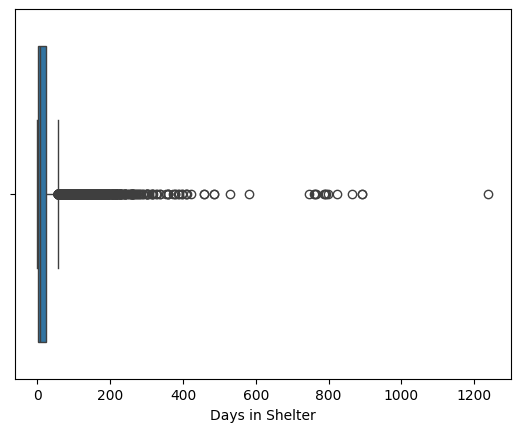

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Days in Shelter"] = df["Days in Shelter"].astype(int)
sns.boxplot(x=df["Days in Shelter"])
plt.show()

In [54]:
df[df["Days in Shelter"] > 600].count()

Name                 13
Type                 13
Breed                13
Color                13
Sex                  13
Size                 13
Date Of Birth        12
Kennel Number        13
Intake Date          13
Days in Shelter      13
Intake Type          13
Outcome Type         13
Intake Condition     13
Outcome Condition    12
Outcome Zip Code     13
Latitude             10
Longitude            10
HasName              13
dtype: int64

In [55]:
df = df[df["Days in Shelter"] < 600]

In [56]:
df = df[df["Days in Shelter"] != 0]

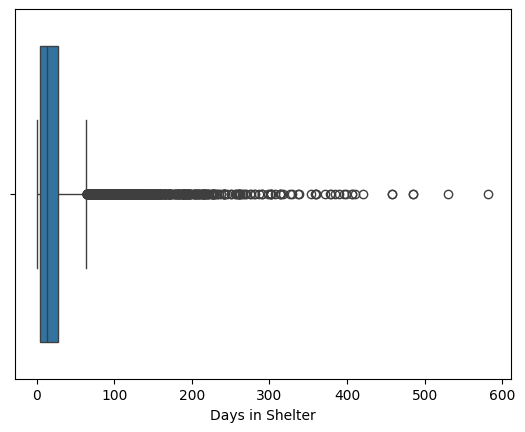

In [57]:
df["Days in Shelter"] = df["Days in Shelter"].astype(int)
sns.boxplot(x=df["Days in Shelter"])
plt.show()

In [58]:
df = df[df["Days in Shelter"] < 400]

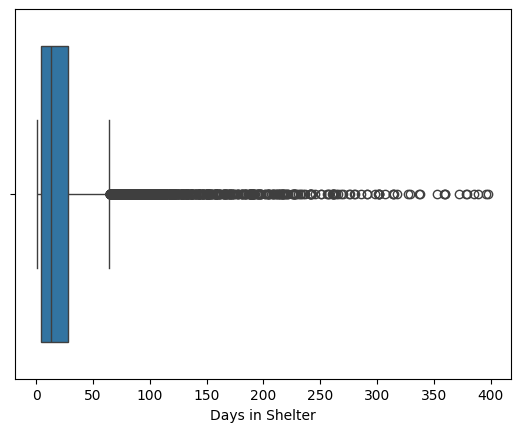

In [59]:
df["Days in Shelter"] = df["Days in Shelter"].astype(int)
sns.boxplot(x=df["Days in Shelter"])
plt.show()

In [60]:
df.isnull().sum()

Name                    0
Type                    0
Breed                   0
Color                   0
Sex                     0
Size                    0
Date Of Birth        4387
Kennel Number           0
Intake Date             0
Days in Shelter         0
Intake Type             0
Outcome Type            4
Intake Condition        0
Outcome Condition     188
Outcome Zip Code     2411
Latitude             2677
Longitude            2677
HasName                 0
dtype: int64

In [61]:
from datetime import datetime

df.dropna(subset=['Date Of Birth'], inplace=True)
intake_date = pd.to_datetime(df["Intake Date"])
df["Date Of Birth"] = pd.to_datetime(df["Date Of Birth"])
df['Age'] = (intake_date - df['Date Of Birth']).dt.days.astype(int)//365
df.drop(['Date Of Birth'], axis=1, inplace=True)
df

,Name,Type,Breed,Color,Sex,Size,Kennel Number,Intake Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Outcome Zip Code,Latitude,Longitude,HasName,Age
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,DS62,05/18/2023,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,94951.0,38.29715,-122.66645,1,1
7,Unknown,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,VET,12/23/2022,4,STRAY,DISPOSAL,UNKNOWN,DEAD,95403.0,38.51311,-122.75502,0,11
9,FELLA,CAT,DOMESTIC SH,BRN TABBY/WHITE,Neutered,KITTN,LOBBY,09/04/2018,4,STRAY,ADOPTION,HEALTHY,HEALTHY,89423.0,39.03496,-119.74250,1,0
10,PUDGY,DOG,CHIHUAHUA SH/SCHIPPERKE,TAN,Neutered,MEDIUM,DA27,02/08/2023,35,OWNER SURRENDER,TRANSFER,UNKNOWN,HEALTHY,94103.0,37.77672,-122.40779,1,9
11,LEXI,DOG,AUST CATTLE DOG,WHITE/BLACK,Spayed,MEDIUM,DS49,04/11/2022,52,STRAY,RETURN TO OWNER,UNKNOWN,PENDING,95407.0,38.41483,-122.72707,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25429,Unknown,DOG,AUST CATTLE DOG,TAN/BLACK,Unknown,PUPPY,CS04,02/24/2022,2,STRAY,TRANSFER,TREATABLE/REHAB,TREATABLE/REHAB,94044.0,37.63527,-122.49200,0,0
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,CA02,10/03/2019,20,STRAY,ADOPTION,HEALTHY,HEALTHY,95448.0,38.61064,-122.86883,1,1
25431,JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,CA01,06/20/2018,112,STRAY,TRANSFER,HEALTHY,HEALTHY,95407.0,38.41483,-122.72707,1,0
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,DS70,09/11/2014,21,STRAY,EUTHANIZE,UNTREATABLE,UNTREATABLE,95476.0,38.29188,-122.45728,1,1


In [62]:
df["Age"].unique()

array([ 1, 11,  0,  9,  7, 15,  3, 10,  5,  2, 12,  6,  4, 16,  8, -1, 14,
       13, 21, 19, 20, 18, -2, 17, 30, 25, 22, 23])

In [63]:
df = df[df["Age"] > 0]

In [64]:
df["Age"].unique()

array([ 1, 11,  9,  7, 15,  3, 10,  5,  2, 12,  6,  4, 16,  8, 14, 13, 21,
       19, 20, 18, 17, 30, 25, 22, 23])

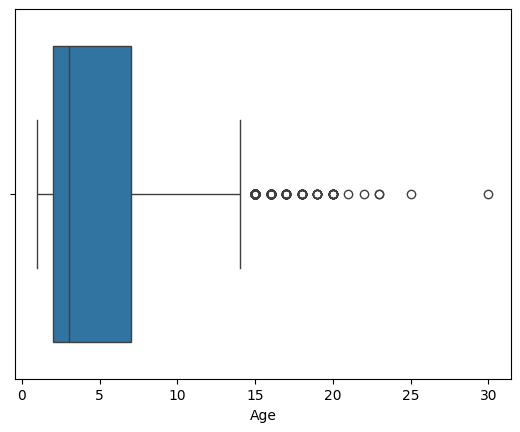

In [65]:
sns.boxplot(x=df["Age"])
plt.show()

In [66]:
df = df[df["Age"] < 25]

In [67]:
# df.drop(df[df["Sex"] == "Unknown"].index, inplace=True)
# df

In [68]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'RABBIT SH', 'GUINEA PIG', 'HAMSTER', 'SATIN',
       'CALIFORNIAN/MIX', 'ENGLISH SPOT', 'LOP-HOLLAND/MIX',
       'BELGIAN HARE/MIX', 'ENGLISH SPOT/MIX', 'REX', 'SHETLAND',
       'LOP-AMER FUZZY', 'RABBIT LH', 'JERSEY/MIX', 'LOP-MINI/MIX',
       'REX/MIX', 'NETHERLND DWARF', 'GOAT', 'CHICKEN', 'DUTCH',
       'COCKATIEL', 'LOP-AMER FUZZY/MIX', 'AMERICAN', 'LOP-MINI', 'LILAC',
       'HARLEQUIN/MIX', 'SILVER', 'HAVANA/MIX', 'HAVANA', 'AMERICAN/REX',
       'THOROUGHBRED', 'RHINELANDER/MIX', 'SILVER/MIX', 'ANGORA-SATIN',
       'DUTCH/MIX', 'BOER', 'HOTOT/MIX', 'CALIFORNIAN',
       'NETHERLND DWARF/MIX', 'PARAKEET', 'NEW ZEALAND WHT', 'SHEEP',
       'LOP-ENGLISH', 'PALOMINO', 'FLORIDA WHITE', 'LOP-HOLLAND', 'HORSE',
       'LOP-ENGLISH/MIX', 'ANGORA-SATIN/MIX', 'RACCOON', 'RAT',
       'NEW ZEALAND WHT/MIX', 'AMERICAN SABLE/MIX', 'HOTOT',
       'AMERICAN/MIX', 'CANARY', 'DOVE', 'PIGEON', 'HORSE/PAINT', 'MOUSE'],
      dtype=object)

In [69]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"] == "PALOMINO/MIX"), "Breed"] = "PALOMINO"

In [70]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'RABBIT SH', 'GUINEA PIG', 'HAMSTER', 'SATIN',
       'CALIFORNIAN/MIX', 'ENGLISH SPOT', 'LOP-HOLLAND/MIX',
       'BELGIAN HARE/MIX', 'ENGLISH SPOT/MIX', 'REX', 'SHETLAND',
       'LOP-AMER FUZZY', 'RABBIT LH', 'JERSEY/MIX', 'LOP-MINI/MIX',
       'REX/MIX', 'NETHERLND DWARF', 'GOAT', 'CHICKEN', 'DUTCH',
       'COCKATIEL', 'LOP-AMER FUZZY/MIX', 'AMERICAN', 'LOP-MINI', 'LILAC',
       'HARLEQUIN/MIX', 'SILVER', 'HAVANA/MIX', 'HAVANA', 'AMERICAN/REX',
       'THOROUGHBRED', 'RHINELANDER/MIX', 'SILVER/MIX', 'ANGORA-SATIN',
       'DUTCH/MIX', 'BOER', 'HOTOT/MIX', 'CALIFORNIAN',
       'NETHERLND DWARF/MIX', 'PARAKEET', 'NEW ZEALAND WHT', 'SHEEP',
       'LOP-ENGLISH', 'PALOMINO', 'FLORIDA WHITE', 'LOP-HOLLAND', 'HORSE',
       'LOP-ENGLISH/MIX', 'ANGORA-SATIN/MIX', 'RACCOON', 'RAT',
       'NEW ZEALAND WHT/MIX', 'AMERICAN SABLE/MIX', 'HOTOT',
       'AMERICAN/MIX', 'CANARY', 'DOVE', 'PIGEON', 'HORSE/PAINT', 'MOUSE'],
      dtype=object)

In [71]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"].str.contains("MIX")), "Breed"] = "MIX"

In [72]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'RABBIT SH', 'GUINEA PIG', 'HAMSTER', 'SATIN',
       'CALIFORNIAN/MIX', 'ENGLISH SPOT', 'LOP-HOLLAND/MIX',
       'BELGIAN HARE/MIX', 'ENGLISH SPOT/MIX', 'REX', 'SHETLAND',
       'LOP-AMER FUZZY', 'RABBIT LH', 'JERSEY/MIX', 'LOP-MINI/MIX',
       'REX/MIX', 'NETHERLND DWARF', 'GOAT', 'CHICKEN', 'DUTCH',
       'COCKATIEL', 'LOP-AMER FUZZY/MIX', 'AMERICAN', 'LOP-MINI', 'LILAC',
       'HARLEQUIN/MIX', 'SILVER', 'HAVANA/MIX', 'HAVANA', 'AMERICAN/REX',
       'THOROUGHBRED', 'RHINELANDER/MIX', 'SILVER/MIX', 'ANGORA-SATIN',
       'DUTCH/MIX', 'BOER', 'HOTOT/MIX', 'CALIFORNIAN',
       'NETHERLND DWARF/MIX', 'PARAKEET', 'NEW ZEALAND WHT', 'SHEEP',
       'LOP-ENGLISH', 'PALOMINO', 'FLORIDA WHITE', 'LOP-HOLLAND', 'HORSE',
       'LOP-ENGLISH/MIX', 'ANGORA-SATIN/MIX', 'RACCOON', 'RAT',
       'NEW ZEALAND WHT/MIX', 'AMERICAN SABLE/MIX', 'HOTOT',
       'AMERICAN/MIX', 'CANARY', 'DOVE', 'PIGEON', 'HORSE/PAINT', 'MOUSE'],
      dtype=object)

In [73]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"].str.contains("GOAT")), "Breed"] = "GOAT"

In [74]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'RABBIT SH', 'GUINEA PIG', 'HAMSTER', 'SATIN',
       'CALIFORNIAN/MIX', 'ENGLISH SPOT', 'LOP-HOLLAND/MIX',
       'BELGIAN HARE/MIX', 'ENGLISH SPOT/MIX', 'REX', 'SHETLAND',
       'LOP-AMER FUZZY', 'RABBIT LH', 'JERSEY/MIX', 'LOP-MINI/MIX',
       'REX/MIX', 'NETHERLND DWARF', 'GOAT', 'CHICKEN', 'DUTCH',
       'COCKATIEL', 'LOP-AMER FUZZY/MIX', 'AMERICAN', 'LOP-MINI', 'LILAC',
       'HARLEQUIN/MIX', 'SILVER', 'HAVANA/MIX', 'HAVANA', 'AMERICAN/REX',
       'THOROUGHBRED', 'RHINELANDER/MIX', 'SILVER/MIX', 'ANGORA-SATIN',
       'DUTCH/MIX', 'BOER', 'HOTOT/MIX', 'CALIFORNIAN',
       'NETHERLND DWARF/MIX', 'PARAKEET', 'NEW ZEALAND WHT', 'SHEEP',
       'LOP-ENGLISH', 'PALOMINO', 'FLORIDA WHITE', 'LOP-HOLLAND', 'HORSE',
       'LOP-ENGLISH/MIX', 'ANGORA-SATIN/MIX', 'RACCOON', 'RAT',
       'NEW ZEALAND WHT/MIX', 'AMERICAN SABLE/MIX', 'HOTOT',
       'AMERICAN/MIX', 'CANARY', 'DOVE', 'PIGEON', 'HORSE/PAINT', 'MOUSE'],
      dtype=object)

In [75]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"] == "AMERICAN/REX"), "Breed"] = "MIX"

In [76]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'RABBIT SH', 'GUINEA PIG', 'HAMSTER', 'SATIN',
       'CALIFORNIAN/MIX', 'ENGLISH SPOT', 'LOP-HOLLAND/MIX',
       'BELGIAN HARE/MIX', 'ENGLISH SPOT/MIX', 'REX', 'SHETLAND',
       'LOP-AMER FUZZY', 'RABBIT LH', 'JERSEY/MIX', 'LOP-MINI/MIX',
       'REX/MIX', 'NETHERLND DWARF', 'GOAT', 'CHICKEN', 'DUTCH',
       'COCKATIEL', 'LOP-AMER FUZZY/MIX', 'AMERICAN', 'LOP-MINI', 'LILAC',
       'HARLEQUIN/MIX', 'SILVER', 'HAVANA/MIX', 'HAVANA', 'AMERICAN/REX',
       'THOROUGHBRED', 'RHINELANDER/MIX', 'SILVER/MIX', 'ANGORA-SATIN',
       'DUTCH/MIX', 'BOER', 'HOTOT/MIX', 'CALIFORNIAN',
       'NETHERLND DWARF/MIX', 'PARAKEET', 'NEW ZEALAND WHT', 'SHEEP',
       'LOP-ENGLISH', 'PALOMINO', 'FLORIDA WHITE', 'LOP-HOLLAND', 'HORSE',
       'LOP-ENGLISH/MIX', 'ANGORA-SATIN/MIX', 'RACCOON', 'RAT',
       'NEW ZEALAND WHT/MIX', 'AMERICAN SABLE/MIX', 'HOTOT',
       'AMERICAN/MIX', 'CANARY', 'DOVE', 'PIGEON', 'HORSE/PAINT', 'MOUSE'],
      dtype=object)

In [77]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(["RABBIT SH", "RABBIT LH"])), "Breed"] = "RABBIT"

In [78]:
# rabbit_breeds = ["LOP-AMER FUZZY",
#                     "LOP-HOLLAND",
#                     "RABBIT",
#                     "DWARF HOTOT",
#                     "MIX",
#                     "REX",
#                     "LOP-MINI",
#                     "LOP-FRENCH",
#                     "SILVER",
#                     "HOTOT",
#                     "ANGORA-ENGLISH",
#                     "DUTCH",
#                     "AMERICAN",
#                     "CALIFORNIAN",
#                     "LOP-ENGLISH",
#                     "ENGLISH SPOT"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(rabbit_breeds)), "Breed"] = "RABBIT"

# roden_breeds = ["GUINEA PIG",
#                 "HAMSTER",
#                 "RAT",
#                 "MOUSE"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(roden_breeds)), "Breed"] = "RODENT"

# live_stock_breeds = ["GOAT",
#                     "CHICKEN",
#                     "SHEEP",
#                     "BOER",
#                     "BARRED ROCK"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(live_stock_breeds)), "Breed"] = "LIVESTOCK"

# bird_breeds = ["PARAKEET",
#                 "COCKATIEL",
#                 "CANARY",
#                 "DOVE"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(bird_breeds)), "Breed"] = "BIRD"

# horse_breeds = ["HORSE",
#                 "SHETLAND",
#                 "PALOMINO"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(horse_breeds)), "Breed"] = "HORSE"

# if "RACCOON" in df["Breed"].values:
#     df.loc[df["Breed"] == "RACCOON", "Type"] = "RACCOON"

In [79]:
dog_types = df[df["Type"] == "DOG"]
sorted(dog_types["Breed"].unique())

['AFFENPINSCHER',
 'AIREDALE TERR',
 'AIREDALE TERR/MIX',
 'AKBASH',
 'AKITA',
 'AKITA/ALASKAN HUSKY',
 'AKITA/ANATOL SHEPHERD',
 'AKITA/CHOW CHOW',
 'AKITA/GERM SHEPHERD',
 'AKITA/LABRADOR RETR',
 'AKITA/MIX',
 'AKITA/PIT BULL',
 'ALASK KLEE KAI',
 'ALASK MALAMUTE',
 'ALASK MALAMUTE/MIX',
 'ALASK MALAMUTE/SIBERIAN HUSKY',
 'ALASKAN HUSKY',
 'ALASKAN HUSKY/BEAGLE',
 'ALASKAN HUSKY/BORDER COLLIE',
 'ALASKAN HUSKY/GERM SHEPHERD',
 'ALASKAN HUSKY/LABRADOR RETR',
 'ALASKAN HUSKY/MIX',
 'ALASKAN HUSKY/PIT BULL',
 'ALASKAN HUSKY/SHIBA INU',
 'AM PIT BULL TER',
 'AM PIT BULL TER/BULLDOG',
 'AM PIT BULL TER/LABRADOR RETR',
 'AM PIT BULL TER/MIX',
 'AM PIT BULL TER/RHOD RIDGEBACK',
 'AMER BULLDOG',
 'AMER BULLDOG/AM PIT BULL TER',
 'AMER BULLDOG/BOXER',
 'AMER BULLDOG/MIX',
 'AMER BULLDOG/PIT BULL',
 'AMER ESKIMO',
 'AMER ESKIMO/MIX',
 'AMER ESKIMO/POMERANIAN',
 'AMER FOXHOUND/GREAT PYRENEES',
 'AMER FOXHOUND/MIX',
 'AMER FOXHOUND/WHIPPET',
 'AMERICAN STAFF',
 'AMERICAN STAFF/CHIHUAHUA SH',
 'A

In [80]:
len(dog_types["Breed"].unique())

645

In [81]:
# df.loc[(df["Type"] == "DOG") & (df["Breed"].str.contains("/")), "Breed"] = "MIX"

In [82]:
dog_types = df[df["Type"] == "DOG"]
len(dog_types["Breed"].unique())

645

In [83]:
df.isnull().sum()

Name                    0
Type                    0
Breed                   0
Color                   0
Sex                     0
Size                    0
Kennel Number           0
Intake Date             0
Days in Shelter         0
Intake Type             0
Outcome Type            0
Intake Condition        0
Outcome Condition      31
Outcome Zip Code     1087
Latitude             1239
Longitude            1239
HasName                 0
Age                     0
dtype: int64

In [84]:
df.dropna(subset=['Kennel Number'], inplace=True)
df.dropna(subset=['Outcome Type'], inplace=True)
df.dropna(subset=['Outcome Condition'], inplace=True)

In [85]:
df.drop(['Outcome Zip Code'], axis=1, inplace=True)
df.drop(['Latitude'], axis=1, inplace=True)
df.drop(['Longitude'], axis=1, inplace=True)

In [86]:
df.isnull().sum()

Name                 0
Type                 0
Breed                0
Color                0
Sex                  0
Size                 0
Kennel Number        0
Intake Date          0
Days in Shelter      0
Intake Type          0
Outcome Type         0
Intake Condition     0
Outcome Condition    0
HasName              0
Age                  0
dtype: int64

In [87]:
# df.drop(df[df["Type"] == "OTHER"].index, inplace=True)

In [88]:
# df = df[~df["Breed"].isin(breed_counts[breed_counts < 20].index)]

## Intake date formatting

In [89]:
df["Intake Date"] = pd.to_datetime(df["Intake Date"])
df

,Name,Type,Breed,Color,Sex,Size,Kennel Number,Intake Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,HasName,Age
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,DS62,2023-05-18,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,1,1
7,Unknown,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,VET,2022-12-23,4,STRAY,DISPOSAL,UNKNOWN,DEAD,0,11
10,PUDGY,DOG,CHIHUAHUA SH/SCHIPPERKE,TAN,Neutered,MEDIUM,DA27,2023-02-08,35,OWNER SURRENDER,TRANSFER,UNKNOWN,HEALTHY,1,9
21,PENNY,DOG,MALTESE/BASSET HOUND,BLACK/WHITE,Female,MEDIUM,DA26,2023-02-08,35,OWNER SURRENDER,TRANSFER,UNKNOWN,HEALTHY,1,7
22,Unknown,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,COOLER,2022-12-14,13,STRAY,DISPOSAL,UNKNOWN,DEAD,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25426,Unknown,DOG,PIT BULL,BLUE/WHITE,Female,MEDIUM,DI104,2020-02-05,16,STRAY,TRANSFER,HEALTHY,HEALTHY,0,5
25427,Unknown,CAT,DOMESTIC SH,BLACK/WHITE,Spayed,SMALL,CS06,2016-11-12,5,STRAY,RETURN TO OWNER,HEALTHY,HEALTHY,0,2
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,CA02,2019-10-03,20,STRAY,ADOPTION,HEALTHY,HEALTHY,1,1
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,DS70,2014-09-11,21,STRAY,EUTHANIZE,UNTREATABLE,UNTREATABLE,1,1


In [90]:
df["Intake Date - Day"] = df["Intake Date"].dt.day
df["Intake Date - Month"] = df["Intake Date"].dt.month
df["Intake Date - Year"] = df["Intake Date"].dt.year
df["Intake Date - Weekday"] = df["Intake Date"].dt.weekday

In [91]:
df.drop(['Intake Date'], axis=1, inplace=True)

In [92]:
df

,Name,Type,Breed,Color,Sex,Size,Kennel Number,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,HasName,Age,Intake Date - Day,Intake Date - Month,Intake Date - Year,Intake Date - Weekday
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,DS62,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,1,1,18,5,2023,3
7,Unknown,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,VET,4,STRAY,DISPOSAL,UNKNOWN,DEAD,0,11,23,12,2022,4
10,PUDGY,DOG,CHIHUAHUA SH/SCHIPPERKE,TAN,Neutered,MEDIUM,DA27,35,OWNER SURRENDER,TRANSFER,UNKNOWN,HEALTHY,1,9,8,2,2023,2
21,PENNY,DOG,MALTESE/BASSET HOUND,BLACK/WHITE,Female,MEDIUM,DA26,35,OWNER SURRENDER,TRANSFER,UNKNOWN,HEALTHY,1,7,8,2,2023,2
22,Unknown,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,COOLER,13,STRAY,DISPOSAL,UNKNOWN,DEAD,0,15,14,12,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25426,Unknown,DOG,PIT BULL,BLUE/WHITE,Female,MEDIUM,DI104,16,STRAY,TRANSFER,HEALTHY,HEALTHY,0,5,5,2,2020,2
25427,Unknown,CAT,DOMESTIC SH,BLACK/WHITE,Spayed,SMALL,CS06,5,STRAY,RETURN TO OWNER,HEALTHY,HEALTHY,0,2,12,11,2016,5
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,CA02,20,STRAY,ADOPTION,HEALTHY,HEALTHY,1,1,3,10,2019,3
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,DS70,21,STRAY,EUTHANIZE,UNTREATABLE,UNTREATABLE,1,1,11,9,2014,3


In [93]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Name'] = encoder.fit_transform(df['Name'])
df['Type'] = encoder.fit_transform(df['Type'])
df['Breed'] = encoder.fit_transform(df['Breed'])
df['Color'] = encoder.fit_transform(df['Color'])
df["Sex"] = encoder.fit_transform(df['Sex'])
df["Size"] = encoder.fit_transform(df['Size'])
df["Kennel Number"] = encoder.fit_transform(df['Kennel Number'])
df["Intake Type"] = encoder.fit_transform(df['Intake Type'])
df["Outcome Type"] = encoder.fit_transform(df['Outcome Type'])
df["Intake Condition"] = encoder.fit_transform(df['Intake Condition'])
df["Outcome Condition"] = encoder.fit_transform(df['Outcome Condition'])
df

,Name,Type,Breed,Color,Sex,Size,Kennel Number,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,HasName,Age,Intake Date - Day,Intake Date - Month,Intake Date - Year,Intake Date - Weekday
4,619,1,676,22,0,4,96,3,5,7,3,1,1,1,18,5,2023,3
7,3224,0,289,133,3,4,151,4,5,2,3,0,0,11,23,12,2022,4
10,2450,1,231,171,2,2,38,35,3,7,3,1,1,9,8,2,2023,2
21,2325,1,456,22,0,2,37,35,3,7,3,1,1,7,8,2,2023,2
22,3224,0,296,61,3,4,8,13,5,2,3,0,0,15,14,12,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25426,3224,1,531,51,0,2,68,16,5,7,0,1,0,5,5,2,2020,2
25427,3224,0,296,22,3,4,11,5,5,5,0,1,0,2,12,11,2016,5
25430,404,0,296,133,2,4,2,20,5,0,0,1,1,1,3,10,2019,3
25432,2799,1,531,183,2,1,104,21,5,4,4,5,1,1,11,9,2014,3


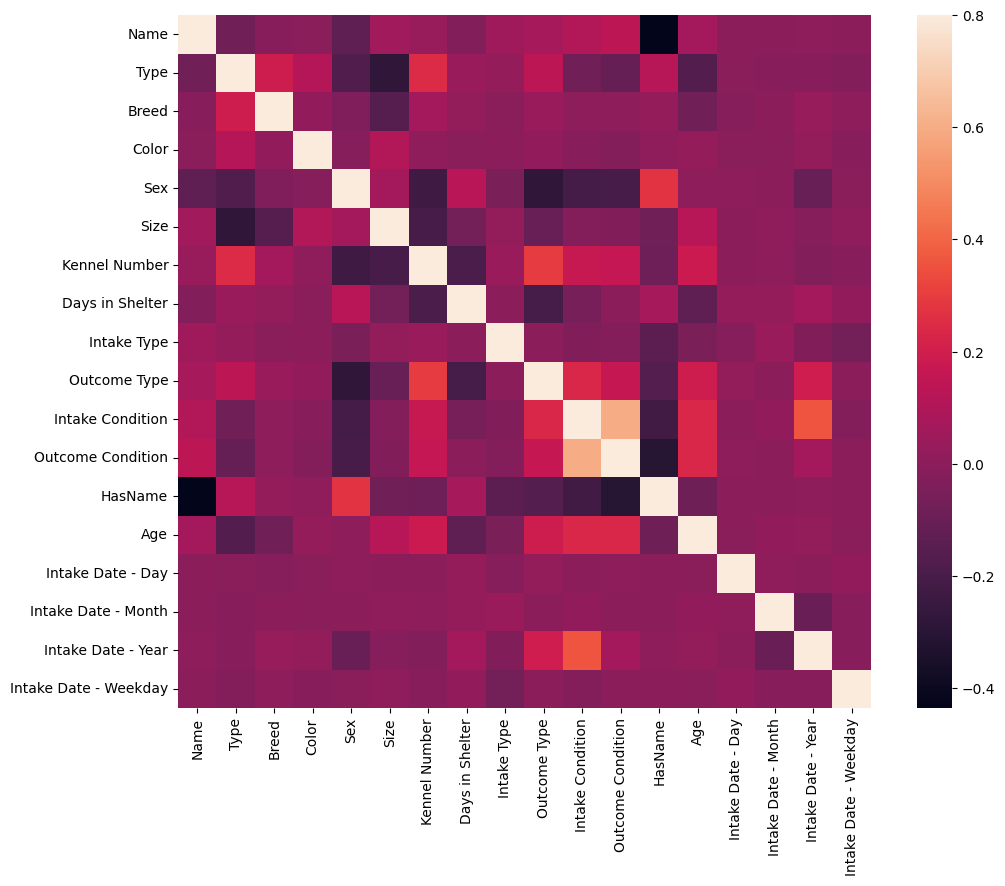

In [94]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [95]:
df.drop(['Type'], axis=1, inplace=True)
df.drop(['Breed'], axis=1, inplace=True)
df.drop(['Color'], axis=1, inplace=True)
df.drop(['Size'], axis=1, inplace=True)
df.drop(['Intake Condition'], axis=1, inplace=True)
df.drop(['Outcome Condition'], axis=1, inplace=True)
df.drop(['Intake Date - Day'], axis=1, inplace=True)
df.drop(['Intake Date - Month'], axis=1, inplace=True)
df.drop(['Intake Date - Weekday'], axis=1, inplace=True)

In [96]:
decision = df["Days in Shelter"]
attributes = df.drop("Days in Shelter", axis=1)

In [97]:
attributes.shape

(9782, 8)

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_minmax_attributes = scaler.fit_transform(attributes)
scaled_minmax_decision = scaler.fit_transform(decision.values.reshape(-1, 1))

In [99]:
from sklearn.preprocessing import StandardScaler
scalerStandard = StandardScaler()
scaled_standard_attributes = scalerStandard.fit_transform(attributes)
scaled_standard_decision = scalerStandard.fit_transform(decision.values.reshape(-1, 1))

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(attributes, decision, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [101]:
scaled_minmax_X_train, scaled_X_temp, scaled_minmax_y_train, scaled_y_temp = train_test_split(scaled_minmax_attributes, scaled_minmax_decision, test_size=0.3, random_state=42)
scaled_minmax_X_val, scaled_minmax_X_test, scaled_minmax_y_val, scaled_minmax_y_test = train_test_split(scaled_X_temp, scaled_y_temp, test_size=0.5, random_state=42)

In [102]:
scaled_standard_X_train, scaled_standard_X_temp, scaled_standard_y_train, scaled_standard_y_temp = train_test_split(scaled_standard_attributes, scaled_standard_decision, test_size=0.3, random_state=42)
scaled_standard_X_val, scaled_standard_X_test, scaled_standard_y_val, scaled_standard_y_test = train_test_split(scaled_standard_X_temp, scaled_standard_y_temp, test_size=0.5, random_state=42)

In [103]:
def graph_for_model(y_val, y_pred, model_name):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_val, y_pred, c='b', marker='o', label='Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('MODEL - {model_name}'.format(model_name=model_name))
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.show()

### Linear regression

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from decimal import Decimal
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

In [105]:
def make_regression(X_train, y_train, X_val, y_val, model_name):
    if model_name == "Linear Regression":
        model = LinearRegression()
    elif model_name == "SVR":
        model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
    elif model_name == "Random Forest Regressor":
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
    elif model_name == "xgboost":
        model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
    elif model_name == "Polinomial Regression":
        poly = PolynomialFeatures(degree=4)
        X_poly = poly.fit_transform(X_train)        
        poly.fit(X_poly, y_train)
        X_train = X_poly

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    rounded_mae_LinearRegression = round(mae, 3)
    rounded_r2_LinearRegression = round(r2, 3)

    print("Mean Absolute Error:", Decimal(str(rounded_mae_LinearRegression)))
    print("R^2 Score:", Decimal(str(rounded_r2_LinearRegression)))

    return y_pred, y_val

Mean Absolute Error: 20.358
R^2 Score: 0.058


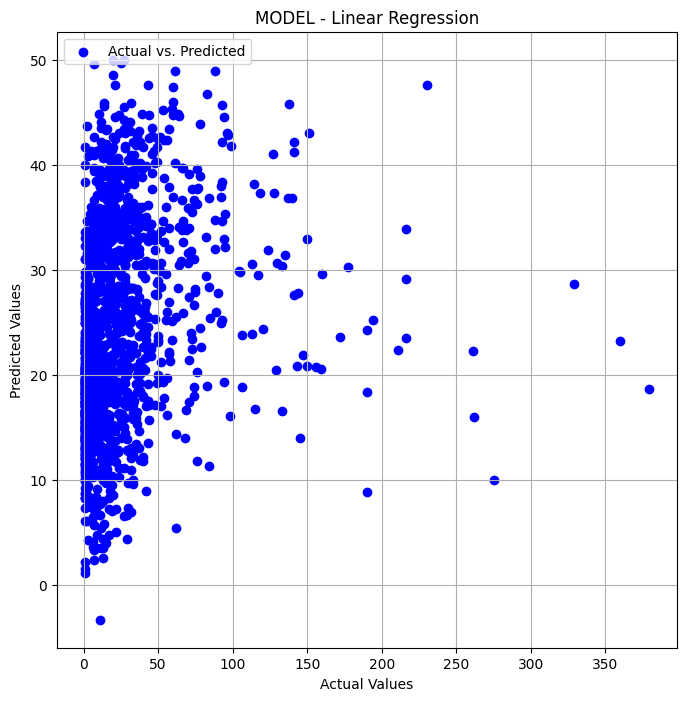

In [106]:
y_pred, y_val_for_graph = make_regression(X_train, y_train, X_val, y_val, "Linear Regression")
graph_for_model(y_val_for_graph, y_pred, "Linear Regression")

Mean Absolute Error: 0.051
R^2 Score: 0.058


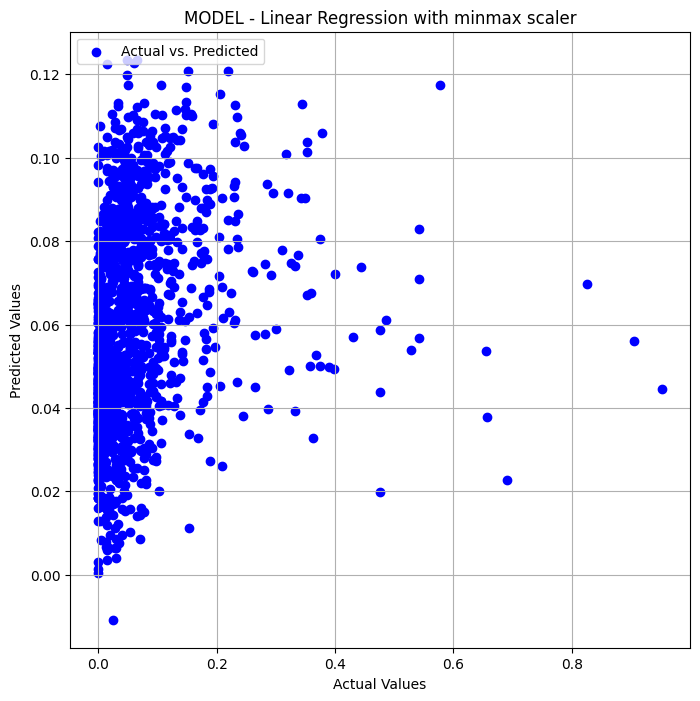

In [107]:
y_pred, y_val_for_graph = make_regression(scaled_minmax_X_train, scaled_minmax_y_train, scaled_minmax_X_val, scaled_minmax_y_val, "Linear Regression")
graph_for_model(y_val_for_graph, y_pred, "Linear Regression with minmax scaler")

Mean Absolute Error: 0.578
R^2 Score: 0.058


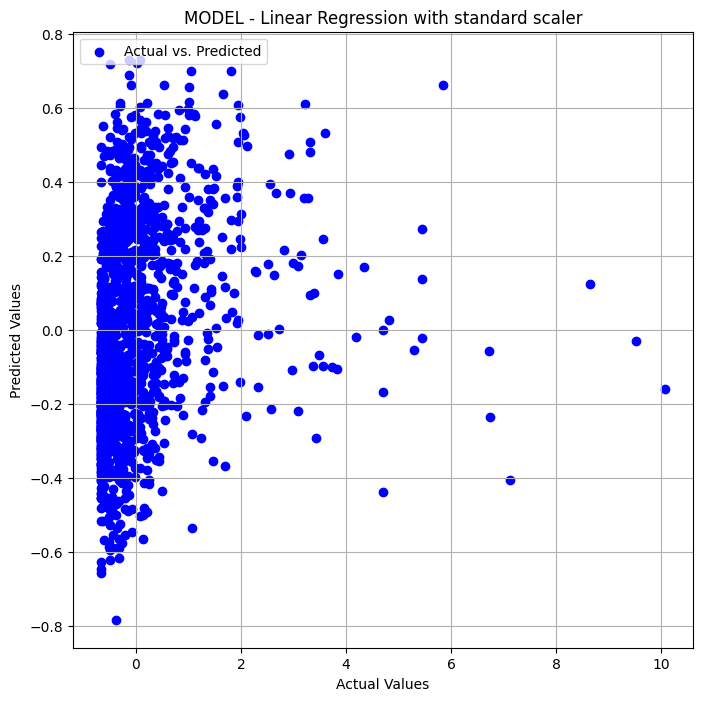

In [108]:
y_pred, y_val_for_graph = make_regression(scaled_standard_X_train, scaled_standard_y_train, scaled_standard_X_val, scaled_standard_y_val, "Linear Regression")
graph_for_model(y_val_for_graph, y_pred, "Linear Regression with standard scaler")

Mean Absolute Error: 20.68
R^2 Score: 0.007


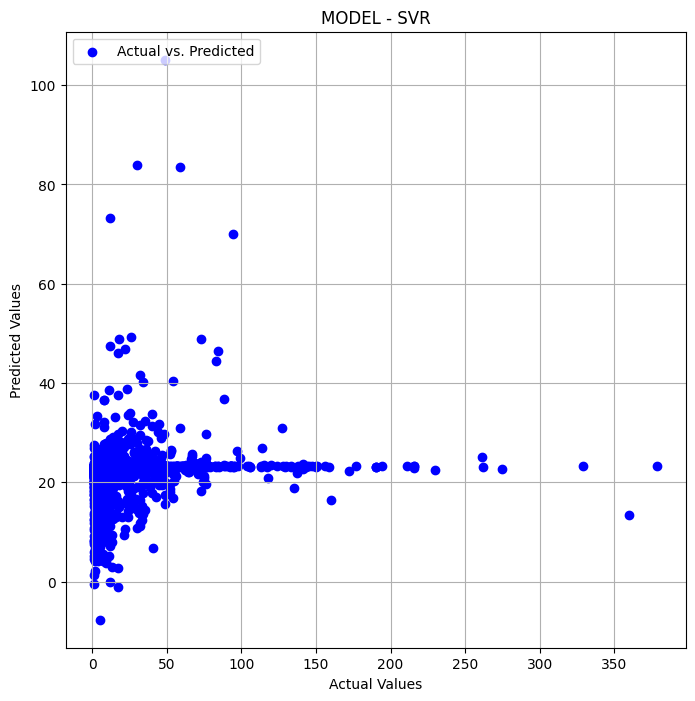

In [109]:
y_pred, y_val_for_graph = make_regression(X_train, y_train, X_val, y_val, "SVR")
graph_for_model(y_val_for_graph, y_pred, "SVR")

c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 0.073
R^2 Score: -0.091


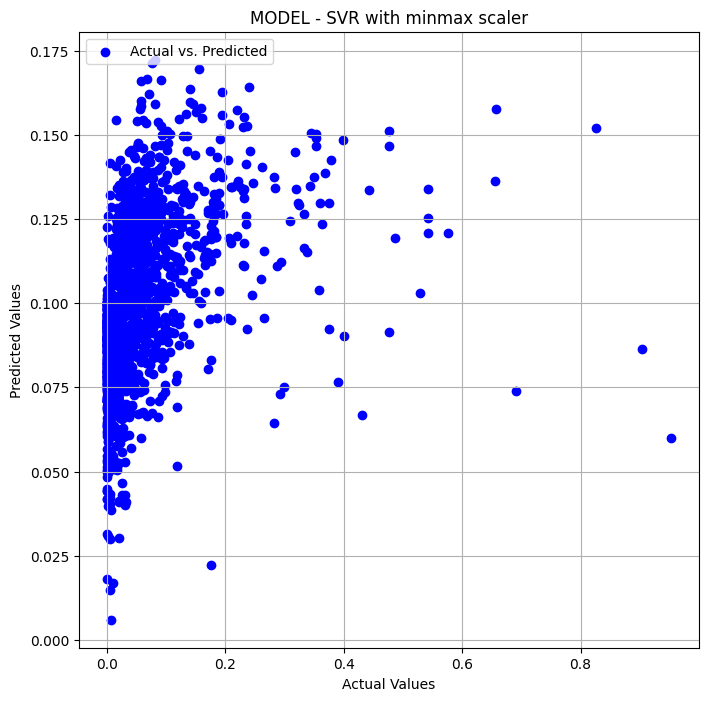

In [110]:
y_pred, y_val_for_graph = make_regression(scaled_minmax_X_train, scaled_minmax_y_train, scaled_minmax_X_val, scaled_minmax_y_val, "SVR")
graph_for_model(y_val_for_graph, y_pred, "SVR with minmax scaler")

c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 0.444
R^2 Score: 0.154


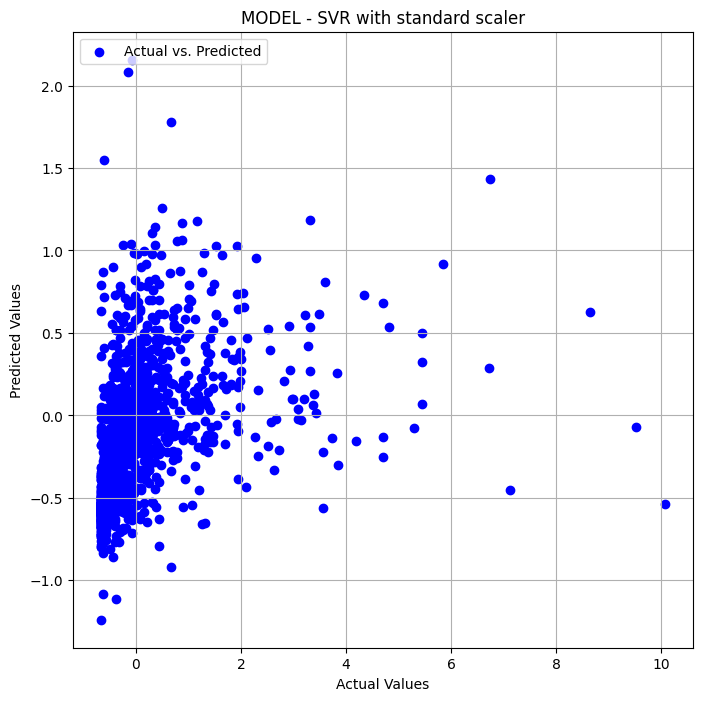

In [111]:
y_pred, y_val_for_graph = make_regression(scaled_standard_X_train, scaled_standard_y_train, scaled_standard_X_val, scaled_standard_y_val, "SVR")
graph_for_model(y_val_for_graph, y_pred, "SVR with standard scaler")

Mean Absolute Error: 15.636
R^2 Score: 0.247


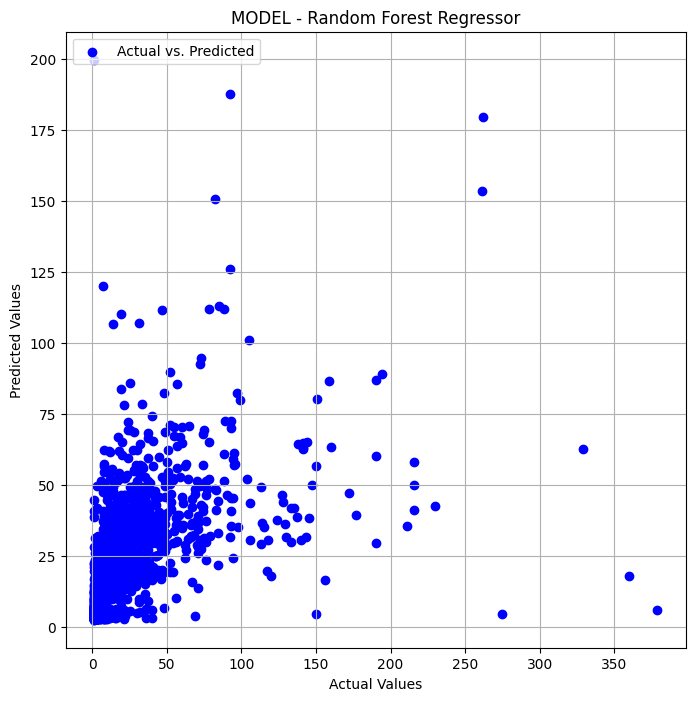

In [112]:
y_pred, y_val_for_graph = make_regression(X_train, y_train, X_val, y_val, "Random Forest Regressor")
graph_for_model(y_val_for_graph, y_pred, "Random Forest Regressor")

c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.039
R^2 Score: 0.248


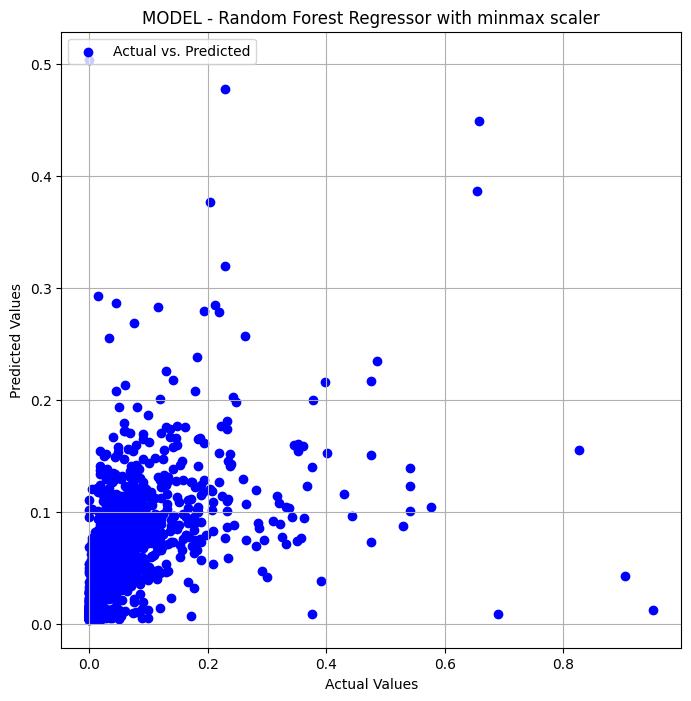

In [113]:
y_pred, y_val_for_graph = make_regression(scaled_minmax_X_train, scaled_minmax_y_train, scaled_minmax_X_val, scaled_minmax_y_val, "Random Forest Regressor")
graph_for_model(y_val_for_graph, y_pred, "Random Forest Regressor with minmax scaler")

c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.444
R^2 Score: 0.249


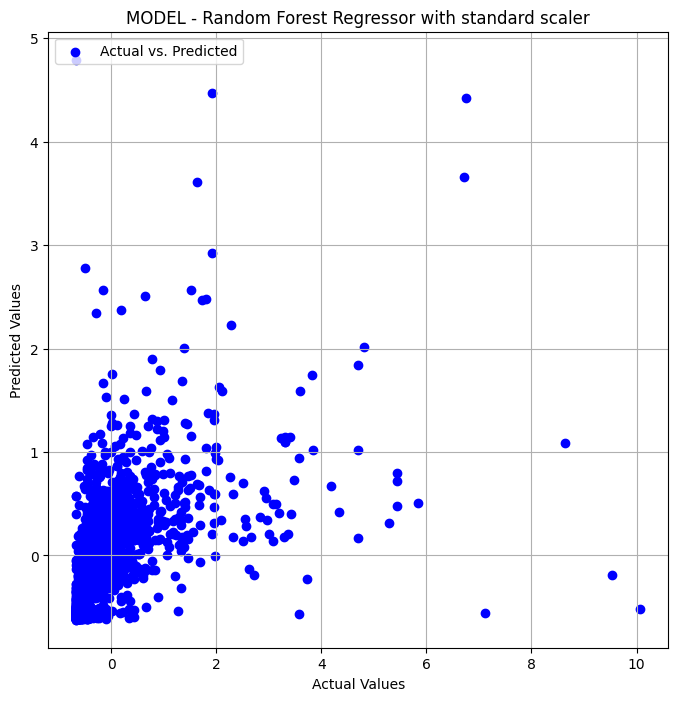

In [114]:
y_pred, y_val_for_graph = make_regression(scaled_standard_X_train, scaled_standard_y_train, scaled_standard_X_val, scaled_standard_y_val, "Random Forest Regressor")
graph_for_model(y_val_for_graph, y_pred, "Random Forest Regressor with standard scaler")

c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

Mean Absolute Error: 19.805
R^2 Score: 0.086


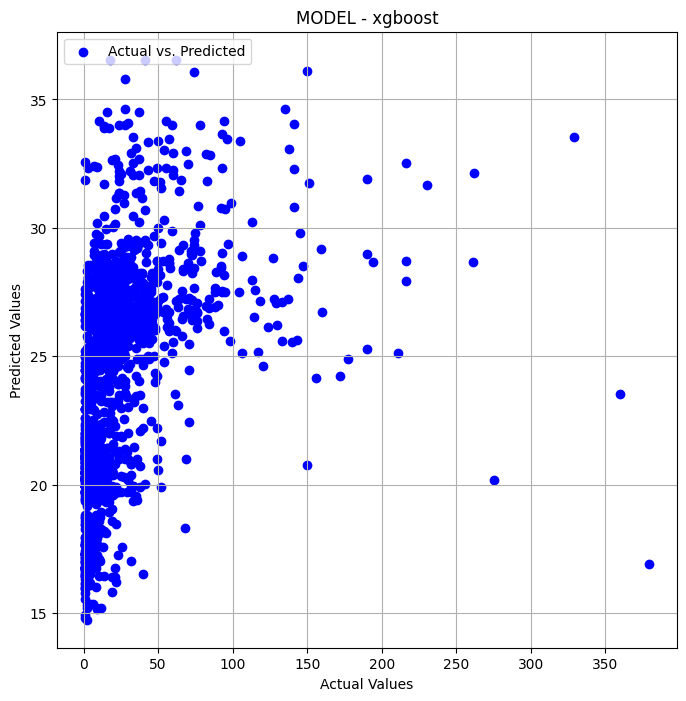

In [115]:
y_pred, y_val_for_graph = make_regression(X_train, y_train, X_val, y_val, "xgboost")
graph_for_model(y_val_for_graph, y_pred, "xgboost")

Mean Absolute Error: 0.051
R^2 Score: 0.066


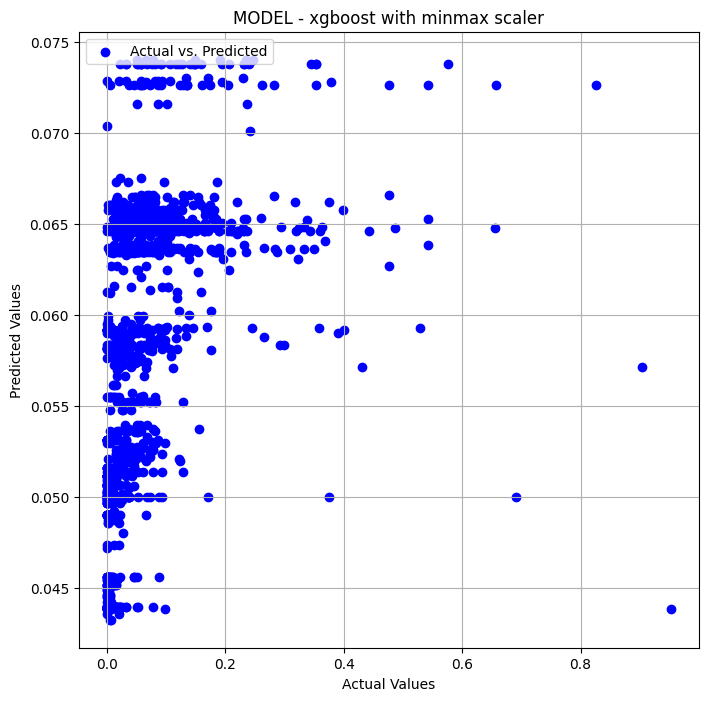

In [116]:
y_pred, y_val_for_graph = make_regression(scaled_minmax_X_train, scaled_minmax_y_train, scaled_minmax_X_val, scaled_minmax_y_val, "xgboost")
graph_for_model(y_val_for_graph, y_pred, "xgboost with minmax scaler")

Mean Absolute Error: 0.563
R^2 Score: 0.082


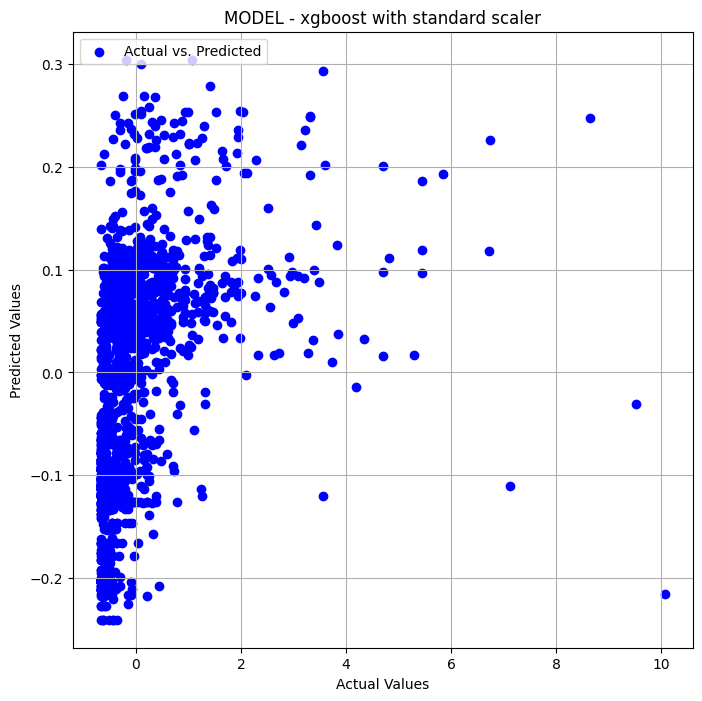

In [117]:
y_pred, y_val_for_graph = make_regression(scaled_standard_X_train, scaled_standard_y_train, scaled_standard_X_val, scaled_standard_y_val, "xgboost")
graph_for_model(y_val_for_graph, y_pred, "xgboost with standard scaler")

## NN

In [118]:
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import R2Score

In [119]:
X_train = X_train.astype(int)
X_val = X_val.astype(int)
X_test = X_test.astype(int)

y_train = y_train.astype(float)
y_val = y_val.astype(float)
y_test = y_test.astype(float)

In [120]:
model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),       
        Dense(64, activation='relu'),        
        Dense(32, activation='relu'),
        Dense(16, activation='sigmoid'),
        Dense(1)
    ])

model.compile(optimizer='nadam', loss= 'mse', metrics=['mae', R2Score()])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

loss, mae, r2 = model.evaluate(X_val, y_val, verbose=0)

metrics = model.metrics_names

print(metrics[0], ":", Decimal(str(round(loss, 3))))
print(metrics[1], ":", Decimal(str(round(mae, 3))))
print(metrics[2], ":", Decimal(str(round(r2, 3))))

loss : 1431.115
mae : 19.77
r2_score : -0.109


In [121]:
import optuna

def objective(trial):
    units_layer1 = trial.suggest_int('units_layer1', 8, 512)
    units_layer2 = trial.suggest_int('units_layer2', 8, 512)
    units_layer3 = trial.suggest_int('units_layer3', 8, 512)
    units_layer4 = trial.suggest_int('units_layer4', 8, 512)
    units_layer5 = trial.suggest_int('units_layer5', 8, 512)
    units_layer6 = trial.suggest_int('units_layer6', 8, 512)

    dropout_rate1 = trial.suggest_float('dropout_rate1', 0.1, 0.7)

    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])
    activation2 = trial.suggest_categorical('activation2', ['relu', 'tanh', 'sigmoid'])
    activation3 = trial.suggest_categorical('activation3', ['relu', 'tanh', 'sigmoid'])
    activation4 = trial.suggest_categorical('activation4', ['relu', 'tanh', 'sigmoid'])
    activation5 = trial.suggest_categorical('activation5', ['relu', 'tanh', 'sigmoid'])
    activation6 = trial.suggest_categorical('activation6', ['relu', 'tanh', 'sigmoid'])

    kernel_initializer = trial.suggest_categorical('kernel_initializer', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_initializer2 = trial.suggest_categorical('kernel_initializer2', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_initializer3 = trial.suggest_categorical('kernel_initializer3', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_initializer4 = trial.suggest_categorical('kernel_initializer4', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_initializer5 = trial.suggest_categorical('kernel_initializer5', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_initializer6 = trial.suggest_categorical('kernel_initializer6', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])

    kernel_regularizer_value = trial.suggest_float('kernel_regularizer_value', 0.01, 0.1)
    kernel_regularizer_value2 = trial.suggest_float('kernel_regularizer_value2', 0.01, 0.1)
    kernel_regularizer_value3 = trial.suggest_float('kernel_regularizer_value3', 0.01, 0.1)
    kernel_regularizer_value4 = trial.suggest_float('kernel_regularizer_value4', 0.01, 0.1)
    kernel_regularizer_value5 = trial.suggest_float('kernel_regularizer_value5', 0.01, 0.1)
    kernel_regularizer_value6 = trial.suggest_float('kernel_regularizer_value6', 0.01, 0.1)

    model = tf.keras.models.Sequential([
        Dense(units_layer1, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=l2(kernel_regularizer_value), input_shape=(X_train.shape[1],)),
        Dense(units_layer2, activation=activation2, kernel_initializer=kernel_initializer2, kernel_regularizer=l2(kernel_regularizer_value2)),
        Dense(units_layer3, activation=activation3, kernel_initializer=kernel_initializer3, kernel_regularizer=l2(kernel_regularizer_value3)),
        Dense(units_layer4, activation=activation4, kernel_initializer=kernel_initializer4, kernel_regularizer=l2(kernel_regularizer_value4)),
        Dense(units_layer5, activation=activation5, kernel_initializer=kernel_initializer5, kernel_regularizer=l2(kernel_regularizer_value5)),
        Dropout(dropout_rate1),
        Dense(units_layer6, activation=activation6, kernel_initializer=kernel_initializer6, kernel_regularizer=l2(kernel_regularizer_value6)),
        Dense(1)
    ])

    model.compile(optimizer='nadam', loss = 'mse', metrics=['mae', R2Score()])

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    result = model.evaluate(X_val, y_val, verbose=0)

    return result[0]


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

best_model = trial.user_attrs['model']
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

[I 2023-11-05 18:46:30,741] A new study created in memory with name: no-name-64691cbb-3421-41b4-8741-b794768a62ee
[I 2023-11-05 18:47:26,135] Trial 0 finished with value: 1291.709716796875 and parameters: {'units_layer1': 362, 'units_layer2': 90, 'units_layer3': 141, 'units_layer4': 42, 'units_layer5': 147, 'units_layer6': 61, 'dropout_rate1': 0.48523552985050167, 'activation': 'relu', 'activation2': 'relu', 'activation3': 'relu', 'activation4': 'sigmoid', 'activation5': 'relu', 'activation6': 'sigmoid', 'kernel_initializer': 'he_uniform', 'kernel_initializer2': 'he_uniform', 'kernel_initializer3': 'glorot_normal', 'kernel_initializer4': 'he_normal', 'kernel_initializer5': 'he_normal', 'kernel_initializer6': 'he_normal', 'kernel_regularizer_value': 0.012522391292278544, 'kernel_regularizer_value2': 0.08696182570671883, 'kernel_regularizer_value3': 0.06715364762858729, 'kernel_regularizer_value4': 0.015634956233937163, 'kernel_regularizer_value5': 0.07603073079135368, 'kernel_regularize

Number of finished trials:  10
Best trial:
Value:  1291.436279296875
Params: 
    units_layer1: 132
    units_layer2: 161
    units_layer3: 40
    units_layer4: 141
    units_layer5: 33
    units_layer6: 97
    dropout_rate1: 0.3245017068490178
    activation: tanh
    activation2: sigmoid
    activation3: sigmoid
    activation4: tanh
    activation5: sigmoid
    activation6: sigmoid
    kernel_initializer: he_normal
    kernel_initializer2: he_uniform
    kernel_initializer3: he_uniform
    kernel_initializer4: glorot_uniform
    kernel_initializer5: he_uniform
    kernel_initializer6: he_normal
    kernel_regularizer_value: 0.03152088068267334
    kernel_regularizer_value2: 0.0218824231605284
    kernel_regularizer_value3: 0.07135814210713244
    kernel_regularizer_value4: 0.0340600615662064
    kernel_regularizer_value5: 0.022006421220818966
    kernel_regularizer_value6: 0.048605500441352895


KeyError: 'model'

In [ ]:
final_epochs = len(history.epoch)

In [ ]:
history.history.keys()

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_range = range(1, final_epochs + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['root_mean_squared_error'], label='Training RMSE')
# plt.plot(epochs_range, history.history['val_mse'], label='Validation MSE')
plt.legend(loc='upper right')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')

plt.show()


In [ ]:
y_pred = model.predict(X_test)

y_pred

In [ ]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(df_pred.to_string(index=False))

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(y_test, y_pred, c='b', marker='o', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.plot(y_test, y_test, 'r-', linewidth=2)
plt.show()

In [ ]:
import os

folder_path = "./test_data"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Usunięto plik: {filename}")
    except Exception as e:
        print(f"Błąd podczas usuwania pliku {filename}: {e}")

In [ ]:
# import visualkeras
# visualkeras.layered_view(model).show() # display using your system viewer